# Perkenalan
Nama : Arvin Melvillo \
Batch : FTDS - RMT - 020 \
Dataset : [Credit Card Data set](https://www.kaggle.com/datasets/ghoshsaibal/creditcard) \
Latar belakang : Sebuah Bank yang berada di India sedang melakukan pengecekan terhadap applicant applicant kartu kredit mereka. Dalam melakukan pengecekan, mereka melihat bahwa ada beberapa applicant yang memiliki catatan kartu kredit yang tidak dibayar tepat waktu. Oleh karena itu, bank tersebut meminta tim data scientist mereka untuk membuat model yang dapat mengelompokkan kelompok kelompok applicant berdasarkan histori kreditnya dan data - data applicant tersebut. \
Objective : Mengelompokkan applicant berdasarkan histori kreditnya dan data - data applicant tersebut. \
Pengerjaan : Pada kasus ini, data scientist akan menggunakan model K-Means Clustering untuk melakukan pengelompokkan dalam karakteristik applicant. Applicant akan dinilai baik atau buruk berdasarkan dengan histori dari record creditnya. Lalu setelah sudah dikelompokkan, maka data scientist akan melakukan analisa mengenai kelompok karakteristik applicant \
Link PPT : [PPT](https://docs.google.com/presentation/d/1f6oAVerUAxY2fSWv9OZtN-2FxMnYQH_TrUQD10asX-M/edit?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Library for split, standardrize, and encode the dataset
from sklearn.decomposition import PCA #PCA
from sklearn.preprocessing import RobustScaler #Scale
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder #Encode

# For handle outlier
from feature_engine.outliers import Winsorizer

# For Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For Clustering
from sklearn.cluster import KMeans

# For Metrics
from yellowbrick.cluster import SilhouetteVisualizer #Visualisasi
from sklearn.metrics import silhouette_score #Nilai silhouette score

# Data Loading

In [2]:
applicant_df = pd.read_csv('dataset/application_record.csv')
credit_df = pd.read_csv('dataset/credit_record.csv')

In [3]:
applicant_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
applicant_df.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [6]:
credit_df.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [7]:
applicant_df.duplicated().sum() # Melihat data total data duplikat

0

In [8]:
credit_df.duplicated().sum() # Melihat data total data duplikat

0

## Dataset Information

In [9]:
print('Applicant shape:',applicant_df.shape)
print('Credit record shape:',credit_df.shape)

Applicant shape: (438557, 18)
Credit record shape: (1048575, 3)


In [10]:
applicant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Berikut adalah informasi mengenai data - data dari setiap table
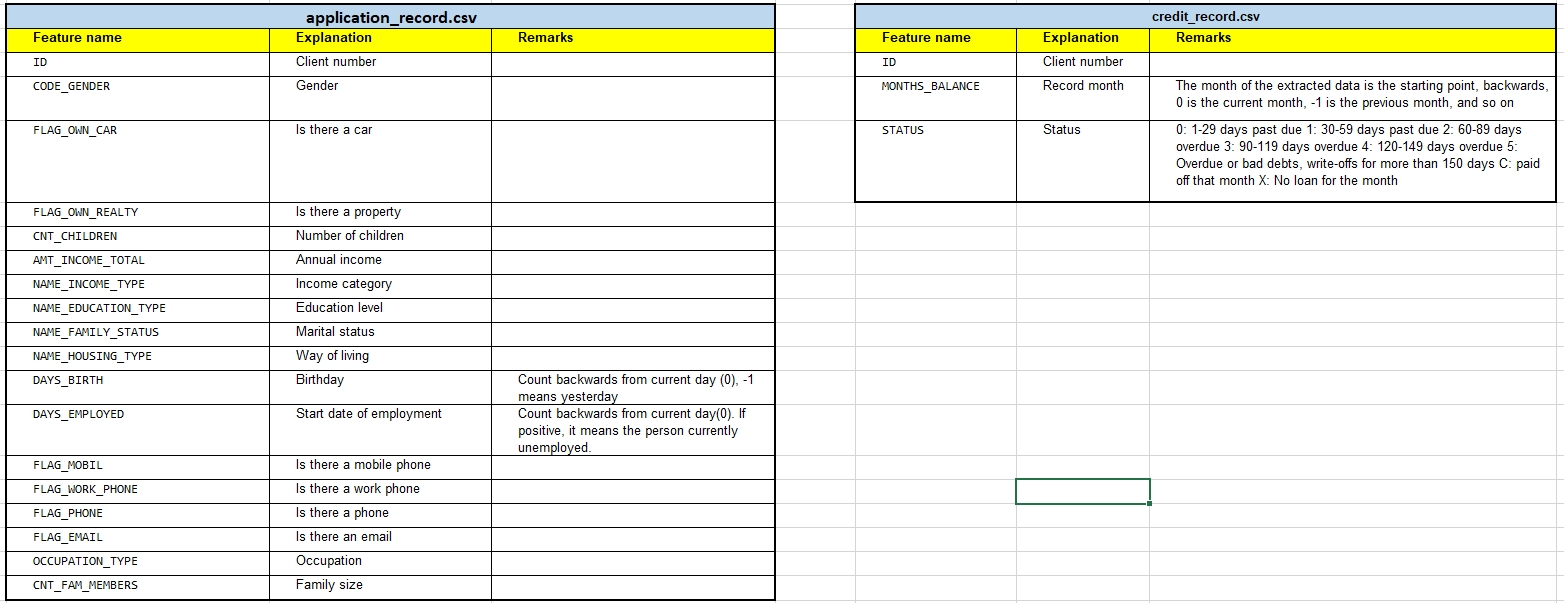

Dari informasi mengenai data - data diatas dapat dikatakan bahwa relasi application_record kepada credit_record merupakan one to many, dimana credit_record menyimpan data terkini dan juga data historical dari record credit.

## Inner Join Data

Karena objektif pada proyek ini adalah Mengelompokkan applicant berdasarkan histori kreditnya dan data - data applicant tersebut. Maka sebaiknya kita gabungkan data applicant dengan data penggunaan kartu kreditnya. Dari data penggunaan kartu kredit tersebut nantinya akan diambil catatan dimana paling lama applicant tidak membayar kredit

In [12]:
credit_df['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [13]:
# 0 = No Loan, 1 = Paid On Time, 2 = Late below 1 month, 3 = Late for 1 month, 4 = Late for 2 Month
# 5 = Late for 3 Month, 6 = Late for 4 Month, 7 = Write offs overdue more than 5 Months
def ordinal_status(input_string):
    if input_string == "X":
        return 0
    elif input_string == "C":
        return 1
    elif input_string == '0':
        return 2
    elif input_string == '1':
        return 3
    elif input_string == '2':
        return 4
    elif input_string == '3':
        return 5
    elif input_string == '4':
        return 6
    elif input_string == '5':
        return 7

In [14]:
credit_df['STATUS'] = credit_df['STATUS'].apply(lambda x:ordinal_status(x))

In [15]:
credit_df = credit_df.groupby('ID')['STATUS'].max()

In [16]:
credit_df.value_counts()

STATUS
2    34682
3     4683
0     4536
1     1417
4      336
7      195
5       88
6       48
Name: count, dtype: int64

In [17]:
credit_df.head()

ID
5001711    2
5001712    2
5001713    0
5001714    0
5001715    0
Name: STATUS, dtype: int64

In [18]:
## Join Data
df_merged = pd.merge(applicant_df, credit_df, how='inner', on='ID')

In [19]:
df_merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,3
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,3
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,2
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [20]:
df_merged.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,7
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,7
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,7
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,4
36456,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,4


In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [22]:
df_merged.shape

(36457, 19)

In [23]:
df_merged['STATUS'].value_counts()

STATUS
2    27711
3     3675
0     3347
1     1108
4      314
7      180
5       76
6       46
Name: count, dtype: int64

In [24]:
df_merged.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
STATUS                     8
dtype: int64

# Explarotary Data Analysis

In [25]:
# Informasi mengenai column categorical atau numerical didapatkan di sub section Data Information
cat_col = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
           'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL',
           'OCCUPATION_TYPE','STATUS']
num_col = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS']

## Check Cardinality

In [26]:
df_merged[cat_col].nunique()

CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        5
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
FLAG_MOBIL              1
FLAG_WORK_PHONE         2
FLAG_PHONE              2
FLAG_EMAIL              2
OCCUPATION_TYPE        18
STATUS                  8
dtype: int64

Dari hasil pengecekan cardinality diatas, dapat dikatakan bahwa semua data memiliki cardinality yang rendah. Dimana cardinality tertinggi yang berada pada total cardinality 18 oleh **OCCUPATION_TYPE**. Cardinality tersebut masih dikatakan cukup rendah karena data applicant ada sekitar 400 ribu applicant

## Check Missing Values

In [27]:
df_merged.isnull().sum().sort_values(ascending=False).head() / len(df_merged) * 100

OCCUPATION_TYPE    31.058507
ID                  0.000000
DAYS_BIRTH          0.000000
CNT_FAM_MEMBERS     0.000000
FLAG_EMAIL          0.000000
dtype: float64

Terdapat missing value pada dataset ,mari lakukan pengecekan tipe missing value pada data **OCCUPATION_TYPE** pada data applicant. Dikarenakan missing valuenya sangatlah banyak maka lebih baik data **OCCUPATION_TYPE** ini di drop saja nantinya dan tidak perlu dianalisa lebih lanjut

In [28]:
cat_col.remove('OCCUPATION_TYPE')
print(cat_col)

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'STATUS']


## Data Distribution Check

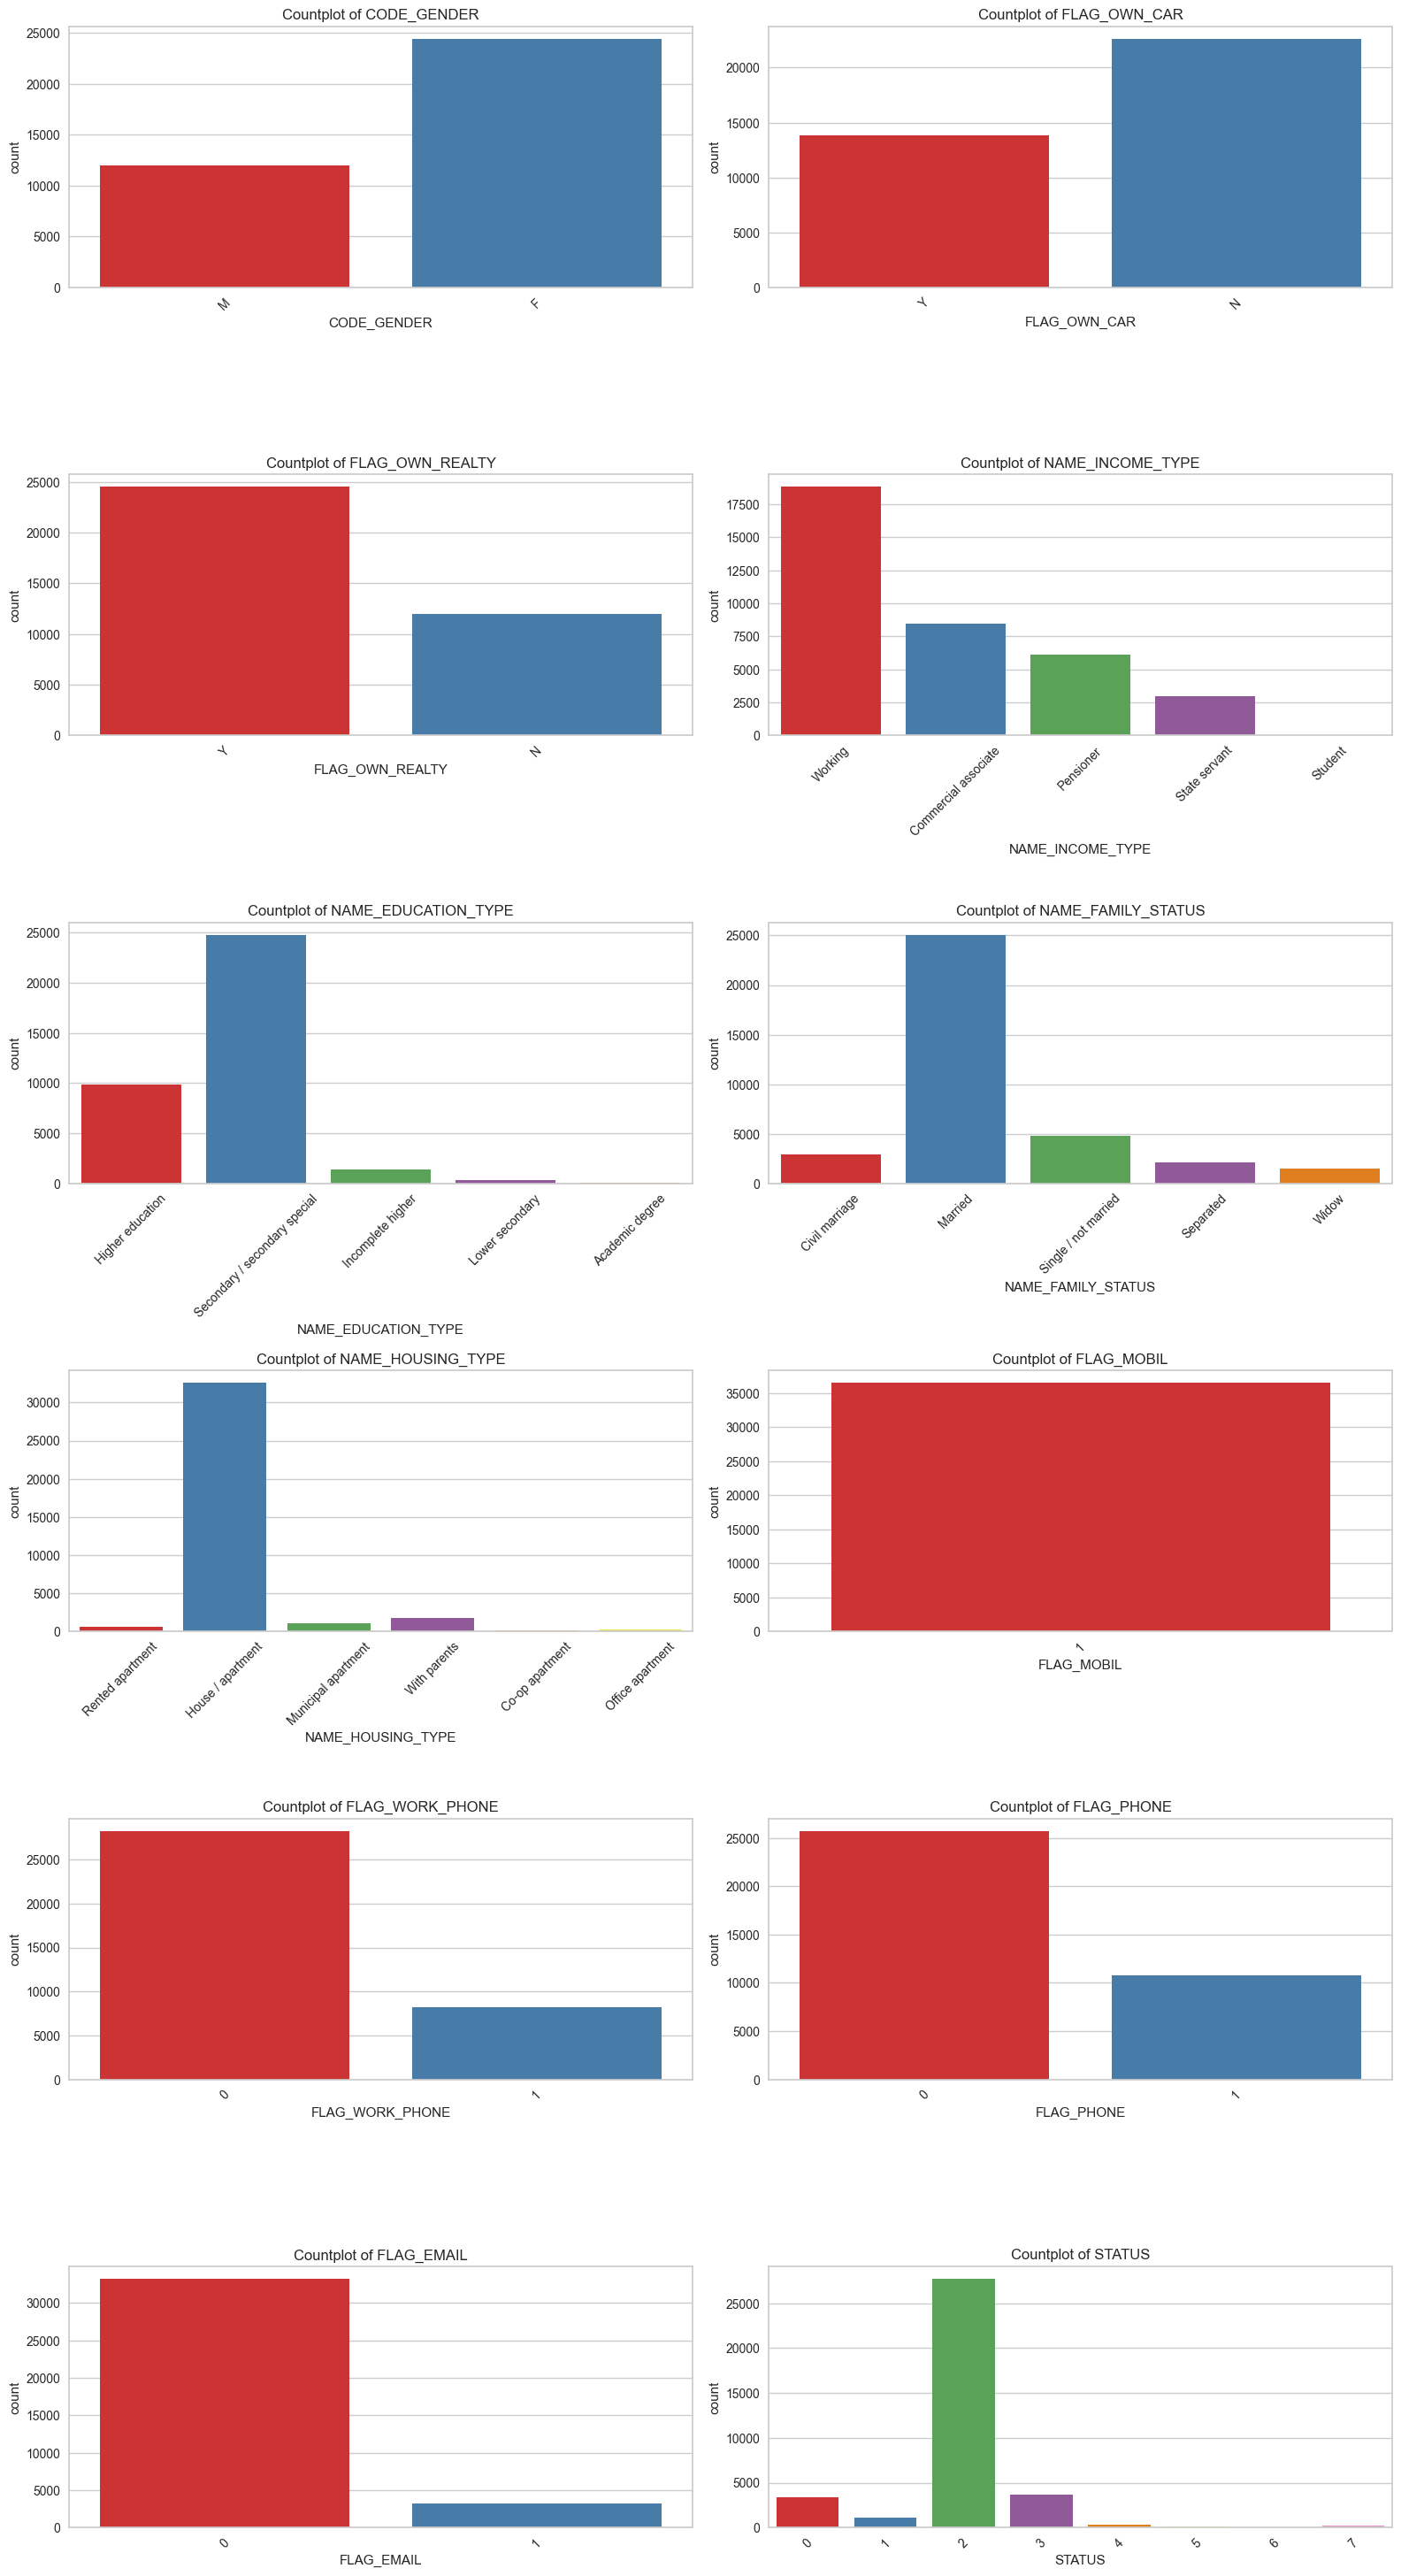

In [29]:
total_col = len(cat_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in cat_col:
    plt.subplot(total_col * 2, 2, i)
    sns.countplot(x = col, palette = 'Set1', data = df_merged)
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
    i += 1

plt.tight_layout()
plt.show()

Kebanyakan applicant yang meminta permohonan kredit merupakan:
- Seorang wanita atau memiliki jenis kelamin wanita
- Cenderung tidak memiliki mobil
- Memiliki properti sendiri
- Mendapatkan income dengan bekerja
- Sudah menyelesaikan pendidikan khusus
- Sudah menikah
- Tinggal dirumah / apartemen
- Tidak memiliki telepon kerja ataupun telepon
- Tidak memiliki email

Selain itu diketahui bahwa semua applicant memiliki smartphone sehingga fitur tersebut tidak ada gunanya untuk dipertahankan kedepannya

C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\4126547988.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x = col, palette = 'Set1', fill=True, data = df_merged)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\4126547988.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x = col, palette = 'Set1', fill=True, data = df_merged)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\4126547988.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x = col, palette = 'Set1', fill=True, data = df_merged)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\4126547988.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x = col, palette = 'Set1', fill=True, data = df_merged)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\4126547988.py:6: UserWarning: Ignoring `pale

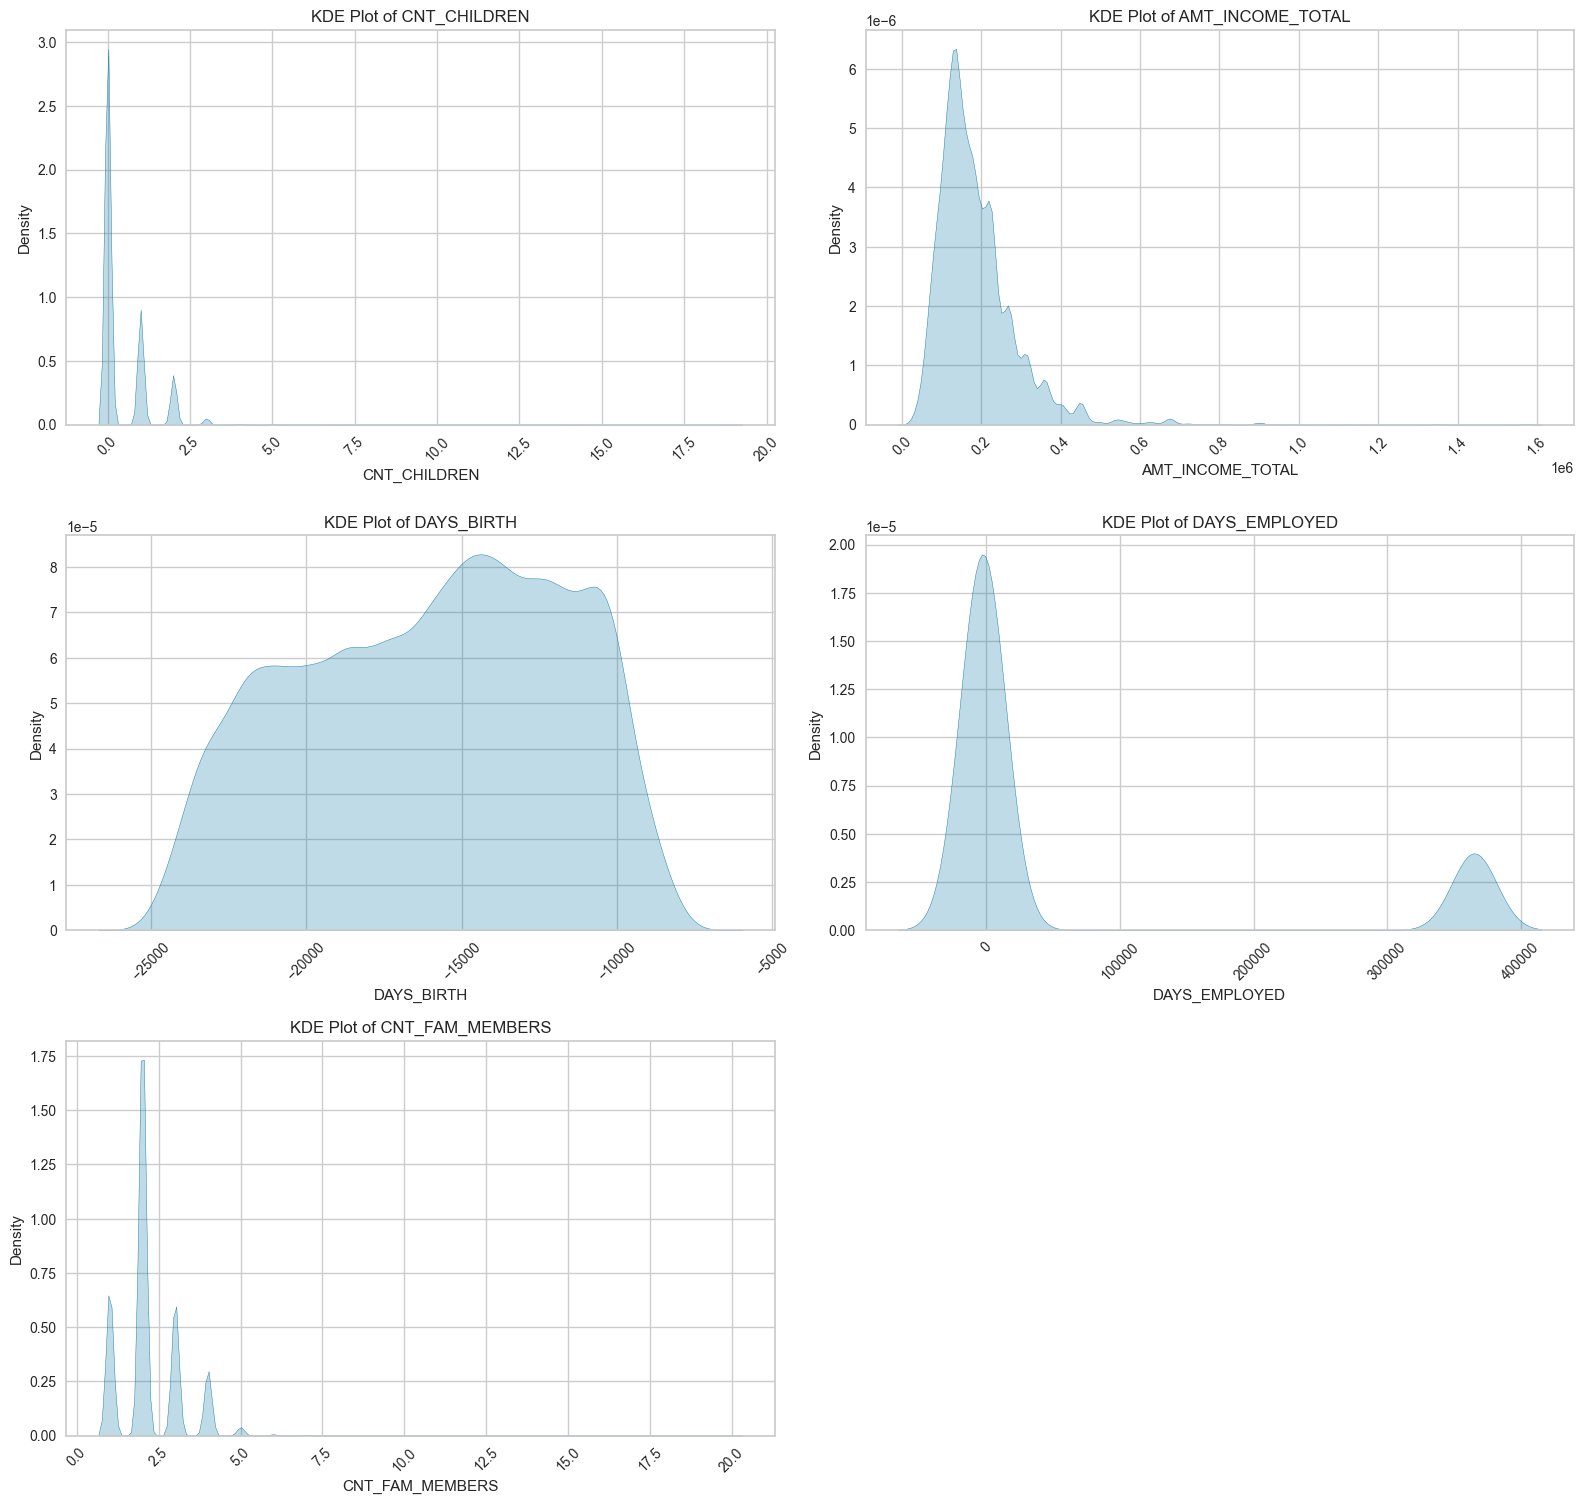

In [30]:
total_col = len(num_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col:
    plt.subplot(total_col * 2, 2, i)
    sns.kdeplot(x = col, palette = 'Set1', fill=True, data = df_merged)
    plt.xticks(rotation=45)
    plt.title(f'KDE Plot of {col}')
    i += 1

plt.tight_layout()
plt.show()

Dari visulisasi diatas dapat dilihat banyak applicant yang **DAYS_EMPLOYED** nya memiliki nilai positif dimana sehingga visualisasi histogram terlihat kurang baik. Oleh karena itu, sebaiknya dibuat column untuk membedakan apakah applicant bekerja atau tidak dan mengubah nilai **DAYS_EMPLOYED** yang positif menjadi 1 saja untuk penanda apakah applicant tersebut bekerja atau tidak bekerja. Selain itu dikarenakan **CNT_CHILDREN** dan **CNT_FAM_MEMBERS** memiliki kemungkinan bahwa variasi nilai mereka kecil, maka lebih baik dibandingkan dengan countplot dibandingkan dengan menggunakan histogram

In [31]:
df_merged['FLAG_EMPLOYED'] = df_merged['DAYS_EMPLOYED'].apply(lambda x: 1 if x < 0 else 0)
df_merged['DAYS_EMPLOYED'] = df_merged['DAYS_EMPLOYED'].apply(lambda x: x if x < 0 else 1)

Text(0.5, 1.0, 'Histogram of DAYS_EMPLOYED')

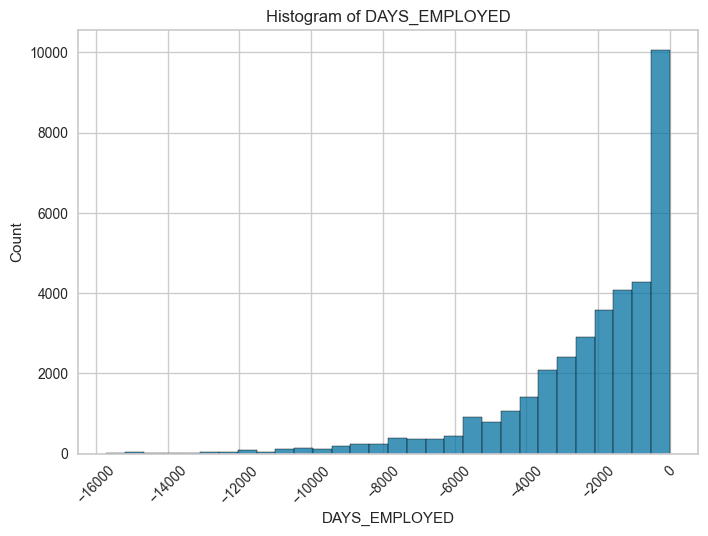

In [32]:
sns.histplot(x = 'DAYS_EMPLOYED', data = df_merged, bins=30)
plt.xticks(rotation=45)
plt.title('Histogram of DAYS_EMPLOYED')

<Axes: ylabel='ID'>

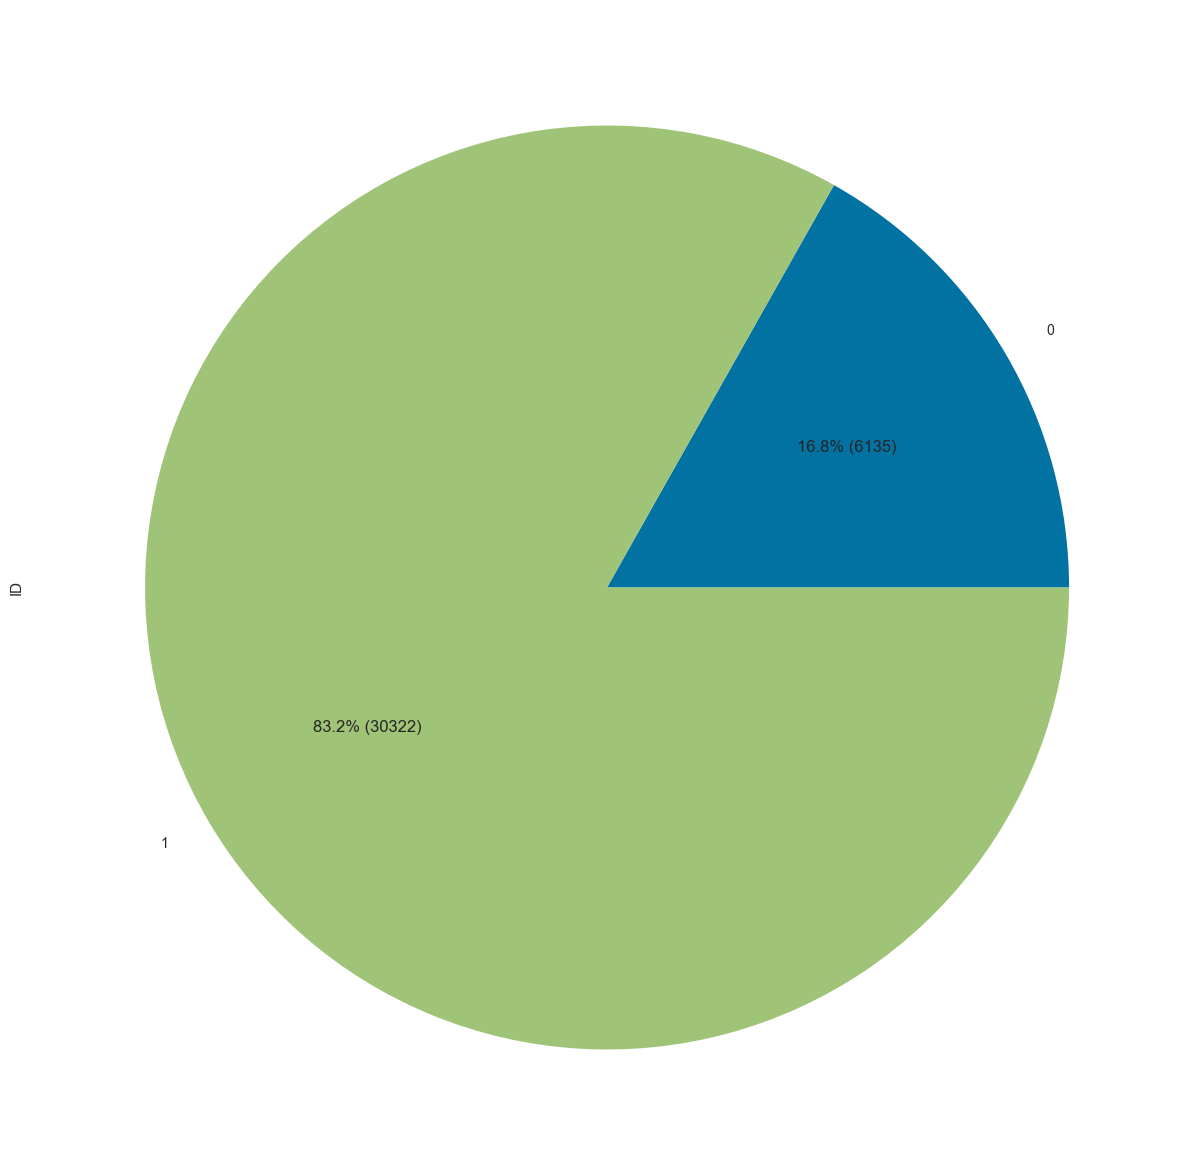

In [33]:
count_employed = df_merged.groupby(['FLAG_EMPLOYED'])['ID'].count()
#fungsi untuk nilai value pada pie chart dimana hasilnya persen (nilai total)
def func(pct):
  return "{:1.1f}% ({})".format(pct, round(count_employed.sum() * pct / 100))
#memunculkan pie untuk data tenure
count_employed.plot.pie(y='ID', autopct= lambda pct: func(pct), figsize = (15,15))

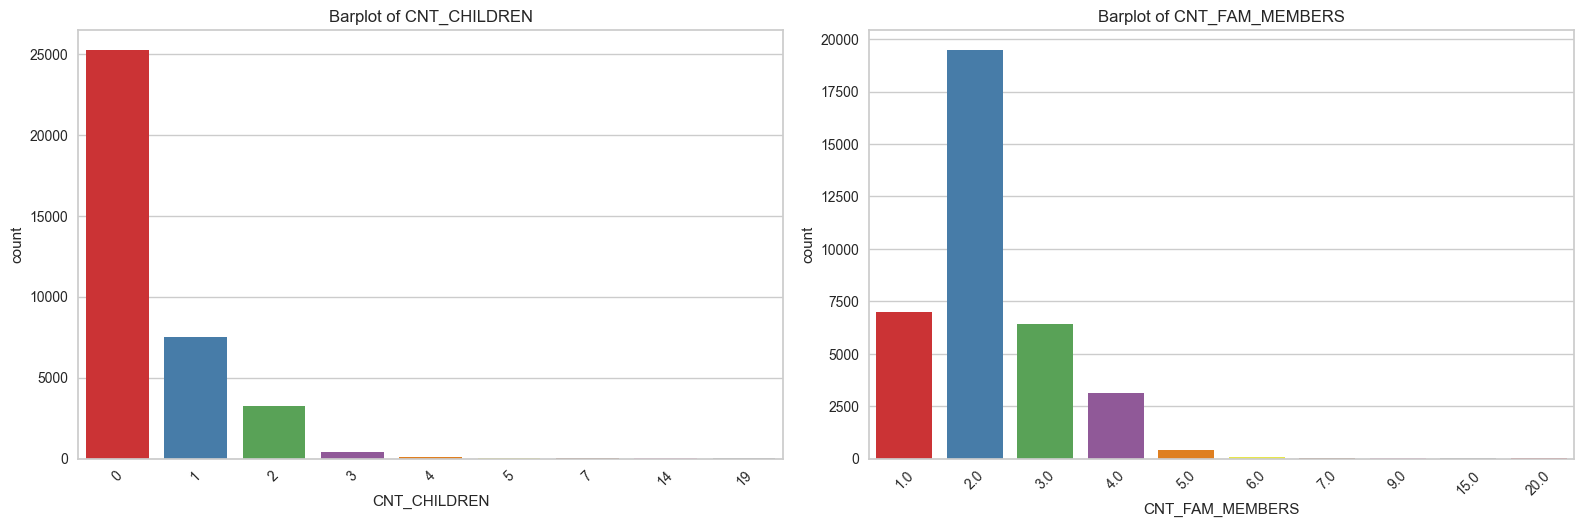

In [34]:
num_col_low_var_check = ['CNT_CHILDREN','CNT_FAM_MEMBERS']
total_col = len(num_col_low_var_check)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col_low_var_check:
    plt.subplot(total_col * 2, 2, i)
    sns.countplot(x = col, palette = 'Set1', data = df_merged)
    plt.xticks(rotation=45)
    plt.title(f'Barplot of {col}')
    i += 1

plt.tight_layout()
plt.show()

Dari hasil visualisasi diatas dapat dikatakan bahwa:
- Kebanyakan applicant tidak memiliki anak atau belum memiliki tanggungan anak
- Applicant cenderung memiliki jumlah keluarga 2 yang dimana sesuai dengan fakta di visualisasi countplot yang dimana applicant memiliki status menikah

In [35]:
cat_col.append('FLAG_EMPLOYED')
cat_col

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'STATUS',
 'FLAG_EMPLOYED']

## Outlier Check

Skewness of CNT_CHILDREN: 2.5693822021105657
Skewness of AMT_INCOME_TOTAL: 2.739009876253129
Skewness of DAYS_BIRTH: -0.18422964957090734
Skewness of DAYS_EMPLOYED: -1.7584471844703933
Skewness of CNT_FAM_MEMBERS: 1.2985959074733653


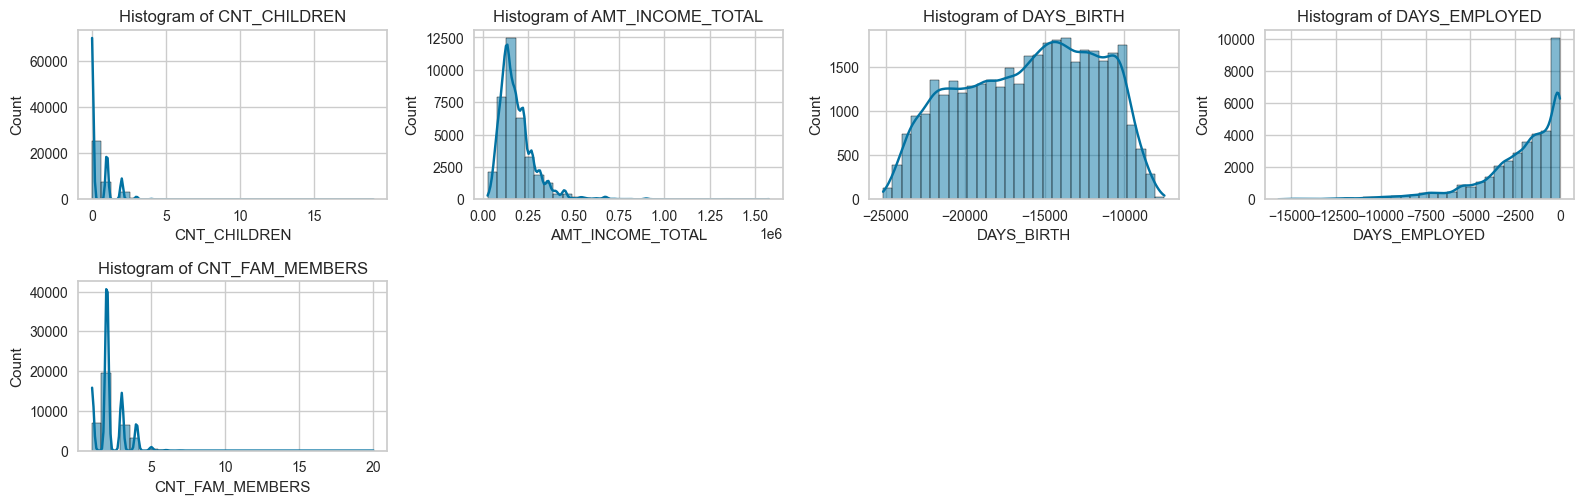

In [36]:
total_col = len(num_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col:
    plt.subplot(total_col * 4, 4, i)
    sns.histplot(df_merged[col], kde=True, bins = 30)
    plt.title(f'Histogram of {col}')
    print(f'Skewness of {col}:',df_merged[col].skew())
    i += 1

plt.tight_layout()
plt.show()

Dari Visualisasi diatas dapat disimpulkan bahwa distribusi dibagi data menjadi 3 yaitu:
- Data **DAYS_BIRTH** memiliki pemusatan data yang sudah terpusah ke tengah.
- Data **CNT_CHILDREN**, **AMT_INCOME_TOTAL**, **DAYS_EMPLOYED** dan **CNT_FAM_MEMBERS** memiliki distribusi data yang cenderung condong ke kiri.

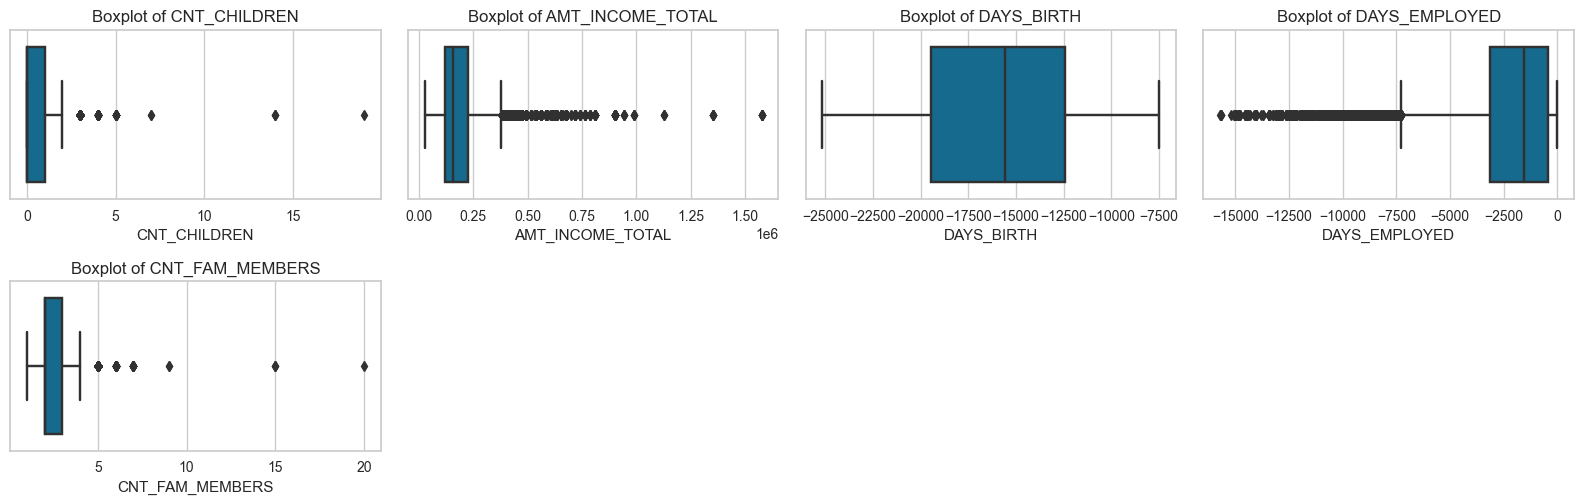

In [37]:
total_col = len(num_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col:
    plt.subplot(total_col * 4, 4, i)
    sns.boxplot(x=df_merged[col])
    plt.title(f'Boxplot of {col}')
    i += 1

plt.tight_layout()
plt.show()

Dari Visualisasi diatas dapat disimpulkan bahwa distribusi dibagi data menjadi 3 yaitu:
- Data **DAYS_BIRTH** tidak memiliki outlier.
- Data **CNT_CHILDREN**, **AMT_INCOME_TOTAL**, **DAYS_EMPLOYED** dan **CNT_FAM_MEMBERS** memiliki outlier di bagian sisi kanan sesuai dengan data visualisasi histogram dimana data - data ini cenderung condong ke kiri.

# Feature Engineering

In [38]:
df_merged_ori = df_merged.copy()

## Handling Missing Values

Missing value pada kasus ini terdapat pada data **OCCUPATION_TYPE** dimana missing valuesnya sangat banyak. Sehingga lebih baik di drop saja dibandingkan dengan di handle dengan imputasi

## Handle Outlier

In [39]:
#Fungsi untuk mendapatkan upper limit dan lower limit
def find_limit(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * distance)
    upper_limit  = df[variable].quantile(0.75) + (IQR * distance)

    return upper_limit, lower_limit

In [40]:
outlier_check = num_col
data_outlier_check = {}
for i in outlier_check:
        data_outlier_check[f'{i}_upper_limit'], data_outlier_check[f'{i}_lower_limit'] = find_limit(df_merged, i, 1.5)

In [41]:
print('Full data:', df_merged.shape)
for i in outlier_check:
    print(f'Data without {i} outlier:',
        df_merged[(df_merged[i] >= data_outlier_check[f'{i}_lower_limit']) & (df_merged[i] <= data_outlier_check[f'{i}_upper_limit'])].shape)
    print(f'Percent outlier for {i}:',
        len(df_merged[(df_merged[i] < data_outlier_check[f'{i}_lower_limit']) | (df_merged[i] > data_outlier_check[f'{i}_upper_limit'])]) / len(df_merged) * 100)

Full data: (36457, 20)
Data without CNT_CHILDREN outlier: (35949, 20)
Percent outlier for CNT_CHILDREN: 1.3934223880187617
Data without AMT_INCOME_TOTAL outlier: (34928, 20)
Percent outlier for AMT_INCOME_TOTAL: 4.193981951339935
Data without DAYS_BIRTH outlier: (36457, 20)
Percent outlier for DAYS_BIRTH: 0.0
Data without DAYS_EMPLOYED outlier: (34687, 20)
Percent outlier for DAYS_EMPLOYED: 4.855034698411828
Data without CNT_FAM_MEMBERS outlier: (35977, 20)
Percent outlier for CNT_FAM_MEMBERS: 1.3166195792303261


Dari data diatas, data **DAYS_BIRTH** tidak memiliki outlier, namun data **DAYS_EMPLOYED** memiliki data outlier yang cukup banyak (21% outlier). Walaupun begitu data outlier pada **DAYS_EMPLOYED** di bagian kanan sendiri memiliki arti bahwa orang tersebut dalam status **unemployed** sehingga lebih baik untuk tidak dihandle outliernya. Selain itu outlier - outlier pada data kolom lain dapat menjadi peranan penting dalam membantu mengkelompokkan karakteristik applicant - applicant

## Make Pipeline For Features

Setelah melakukan splitting dan menghandle outlier, mari buat pipeline untuk fitur - fitur yang akan digunakan oleh model. Pipeline ini nantinya akan dilakukan transformasi dimana ada scaling untuk data numerical dan encoding untuk data categorical

### Split Category and Numerical Columns that has significant relation with STATUS

In [42]:
# Column numerical yang memiliki hubungan signifikan dari hasil uji ttest
num_cols = num_col
# Column categorical yang memiliki hubungan signifikan dari hasil uji chi square
cat_cols = cat_col

In [43]:
num_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS']

In [44]:
cat_cols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'STATUS',
 'FLAG_EMPLOYED']

In [45]:
#Menghapus FLAG_MOBIL karena valuenya sama semua
cat_cols.remove('FLAG_MOBIL')
cat_cols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'STATUS',
 'FLAG_EMPLOYED']

In [46]:
df_merged[num_cols].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,-2200.148888,2.198453
std,0.742367,1.017892e+05,4200.549944,2366.953234,0.911686
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,2.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,2.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,3.000000
max,19.000000,1.575000e+06,-7489.000000,1.000000,20.000000


### Feature Scaling

Pada kasus ini, data **DAYS_EMPLOYED** memiliki outlier meskipun sudah di handle. Sehingga lebih baik data pada kasus ini menggunakan **Robust Scaler**.

In [47]:
numeric_transformer = Pipeline(
    steps=[
        ("scaler", RobustScaler())
    ]
)

### Feature Encoding

Pada kasus ini, data ordinal hanya berada pada data **NAME_EDUCATION_TYPE**. Sedangkan yang lain merupakan categorical jenis nominal, sehingga untuk data **NAME_EDUCATION_TYPE** akan menggunakan **OrdinalEncoder** dan data categorical lain menggunakan **OneHotEncoder**

In [48]:
df_merged['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [49]:
ordinal_cat_col = ['NAME_EDUCATION_TYPE','STATUS']
cat_col.remove('NAME_EDUCATION_TYPE')
cat_col.remove('STATUS')

In [50]:
print(ordinal_cat_col)

['NAME_EDUCATION_TYPE', 'STATUS']


In [51]:
ordinal_categorical_transformer = Pipeline(
    steps=[
        # Asumsi urutan edukasi adalah 'Higher education', 'Secondary / secondary special',
        # 'Incomplete higher', 'Lower secondary', 'Academic degree'
        ("encoder", OrdinalEncoder(categories=[['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],[0,1,2,3,4,5,6,7]])),
    ]
)

In [52]:
nominal_categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown='ignore'))
    ]
)

### Concat the preprocessor

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, np.array(num_cols)),
        ("ordinal_cat", ordinal_categorical_transformer, ordinal_cat_col),
        ("cat", nominal_categorical_transformer, np.array(cat_cols))
    ],
    # Akan menghapus seluruh column yang tidak digunakan, dalam case ini fitur fitur yang tidak dimention cat_cols dan num_cols
    remainder='drop'
)

# Model Definition

## PCA

Sebelum menentukan dimension ingin melakukan reduksi pada dimensi, sebaiknya cek EVR dari PCA nya terlebih dahulu

In [54]:
temp = preprocessor.fit_transform(df_merged)

In [55]:
temp

array([[ 0.        ,  2.60869565,  0.5100344 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  2.60869565,  0.5100344 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.43478261, -0.84733372, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.45527523, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.        ,  1.2173913 , -0.34331995, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.43478261,  0.91384748, ...,  0.        ,
         0.        ,  1.        ]])

In [56]:
pca = PCA()
temp = pca.fit_transform(temp)

In [57]:
evr_temp = pca.explained_variance_ratio_
print(evr_temp)

[1.86994066e-01 1.29665944e-01 1.02778161e-01 8.27734114e-02
 7.50479208e-02 6.13348225e-02 5.52269128e-02 4.72627428e-02
 3.99798169e-02 3.52246919e-02 3.22400050e-02 3.06554180e-02
 2.70878280e-02 1.85956320e-02 1.54687736e-02 1.33308035e-02
 1.27471107e-02 1.10086962e-02 8.70979605e-03 5.34319123e-03
 4.43993376e-03 2.28330351e-03 1.03194274e-03 6.13924212e-04
 6.44087818e-05 5.42949358e-05 3.64471470e-05 2.79879355e-31
 2.54767607e-31 7.49167727e-32 6.35609661e-32 4.76932031e-32
 4.21866242e-32 1.38277995e-32 1.19881113e-32 3.03007865e-33
 3.84914400e-34]


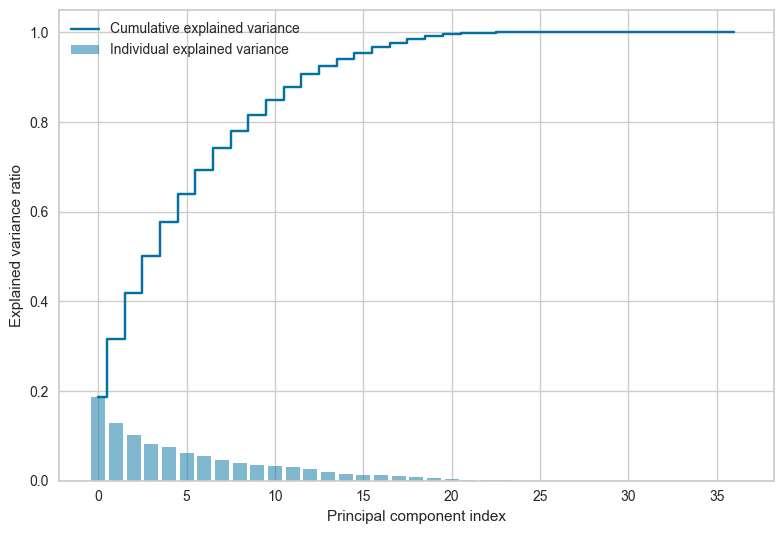

In [58]:
cum_sum_eigenvalues = np.cumsum(evr_temp)
#
# Create the visualization plot
#
plt.bar(range(0,len(evr_temp)), evr_temp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [59]:
cum_sum_eigenvalues

array([0.18699407, 0.31666001, 0.41943817, 0.50221158, 0.5772595 ,
       0.63859433, 0.69382124, 0.74108398, 0.7810638 , 0.81628849,
       0.8485285 , 0.87918391, 0.90627174, 0.92486737, 0.94033615,
       0.95366695, 0.96641406, 0.97742276, 0.98613255, 0.99147574,
       0.99591568, 0.99819898, 0.99923092, 0.99984485, 0.99990926,
       0.99996355, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Dikarenakan peningkatan EVR sudah mulai stagnant pada kumulatif pencapaian ke 0.95 . Maka sebaiknya jumlah component untuk melakukan PCA di set di n_components = 0.95

In [60]:
pca = PCA(n_components=0.95)
data_reduced = pca.fit_transform(preprocessor.fit_transform(df_merged))

## Elbow Method

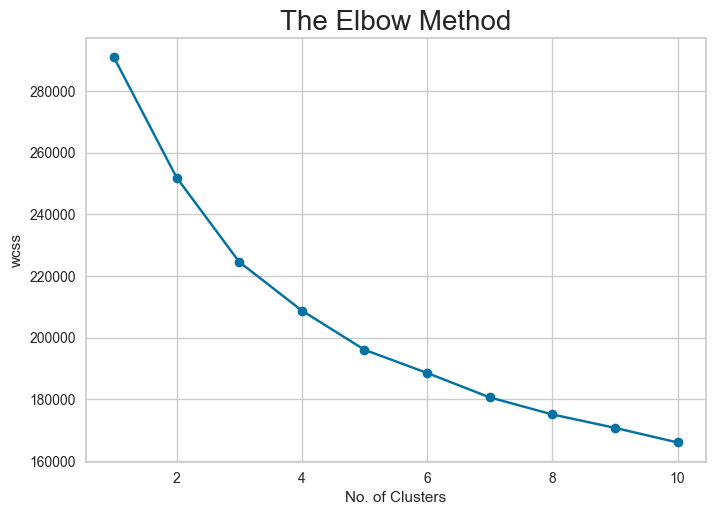

In [61]:
wcss = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(data_reduced)
    wcss.append(km.inertia_)

#Membuat plot untuk elbow method
plt.plot(range(1, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Pada elbow method, data K optimal diantara K = 3 atau K = 5. Perlu di cek sillhoute score untuk melihat K optimal dengan lebih tepat

In [62]:
#Melakukan looping untuk melihat K = 4 atau K = 5 yang lebih optimal nilainya
for i in range(3, 6):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(data_reduced)
    
    #Calculate score
    score = silhouette_score(data_reduced, km.labels_, metric='euclidean')
    print(f'Silhouette score for K = {i}: %.3f' % score)


Silhouette score for K = 3: 0.148
Silhouette score for K = 4: 0.150
Silhouette score for K = 5: 0.150


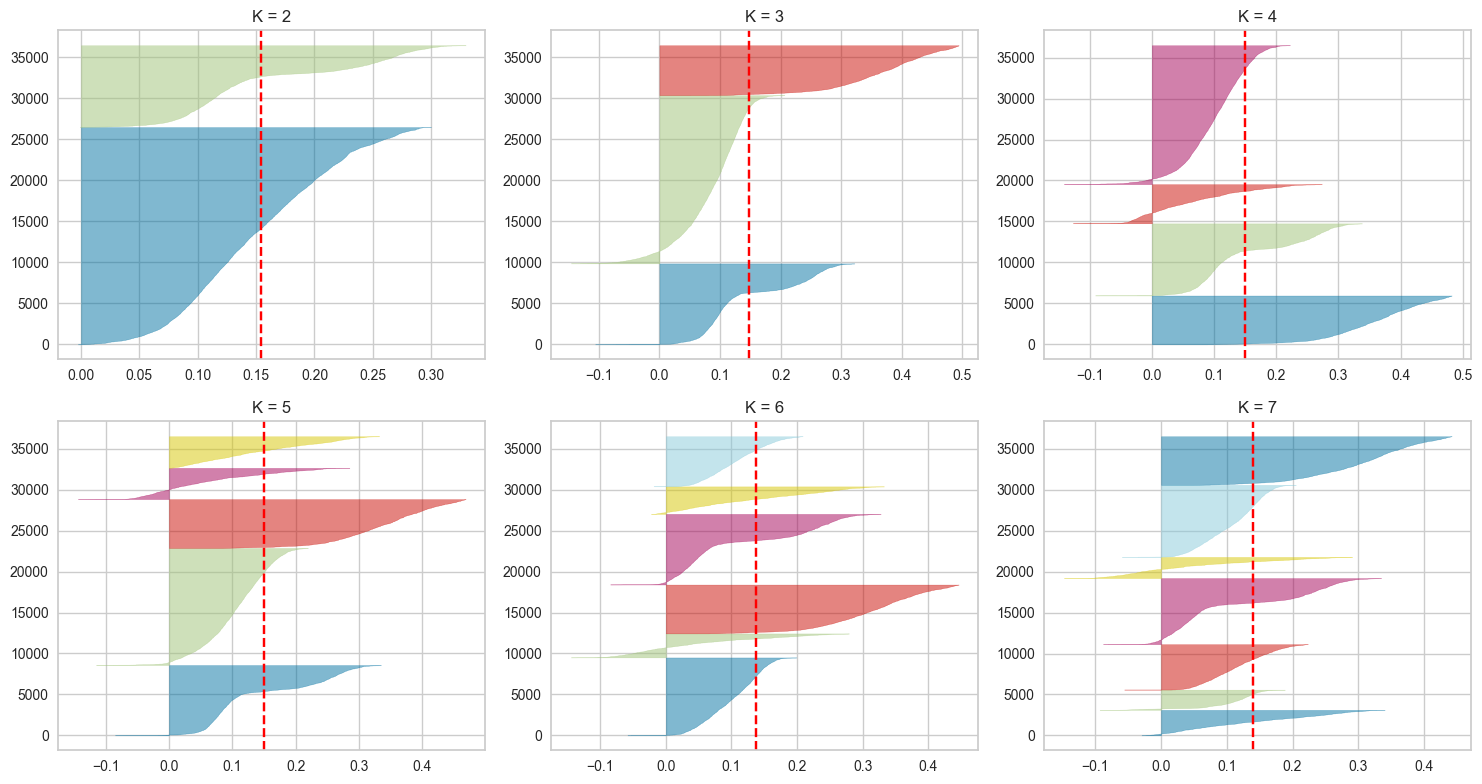

In [63]:
#Membuat plot untuk silhoutte score
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(data_reduced)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Dari visualisasi silhoute score, dapat dilihat bahwa K = 3 memiliki kepadatan kelas yang lebih seimbang sehingga pada kasus ini kita akan mendefinisikan model dengan K = 3

In [64]:
km = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca",pca),
    ("clustering",KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3))
])

# Model Training

In [65]:
km.fit(df_merged)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  array(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS'], dtype='<U16')),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Higher '
                                                                                               'education',
                                                                                               'Secondary '
                                                                                               '/ '
                                                                                               'secondary '
                                                                                               'special',
                                                                                               'Incom...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_EMPLOYED'],
      dtype='<U18'))])),
                ('pca', PCA(n_components=0.95)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=3))])

In [66]:
cluster = km.predict(df_merged)

# EDA after Clustering

In [67]:
#Memasukan nilai cluster ke kolom CLUSTER
df_merged['CLUSTER'] = cluster
cat_col = np.concatenate([cat_col, ordinal_cat_col])
col_used = np.concatenate([cat_col,num_col])

c:\Users\Evaldo Raynardi\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\1202062684.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\1202062684.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\Evaldo Raynardi\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\1202062684.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_16848\120206

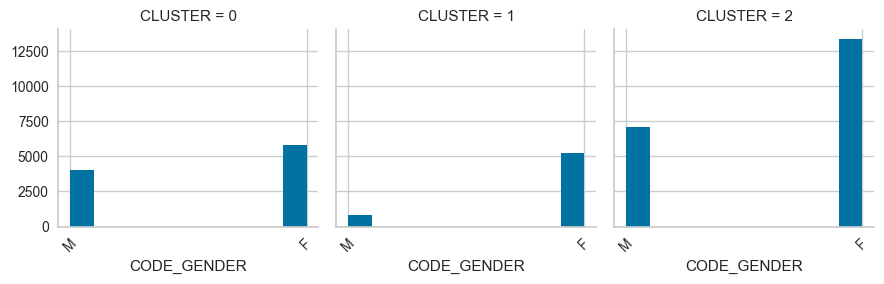

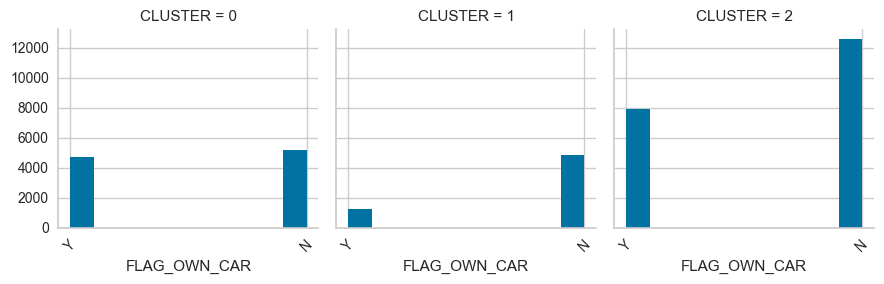

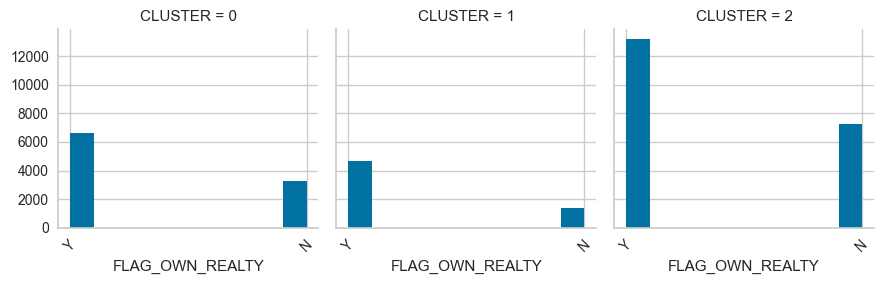

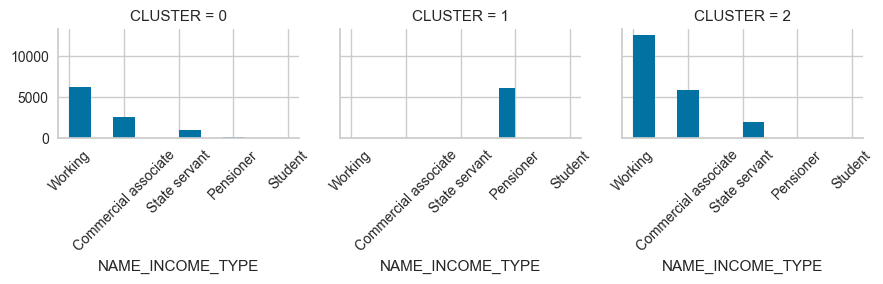

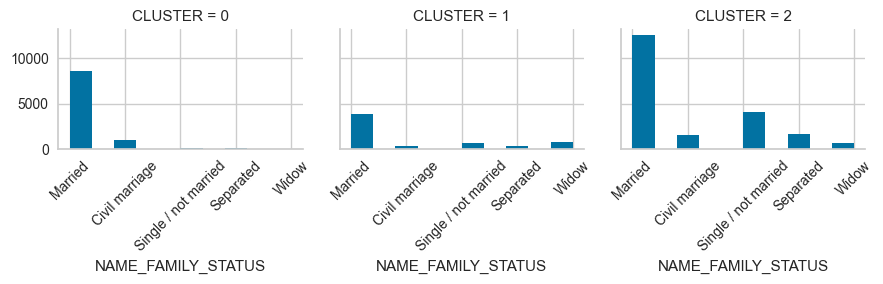

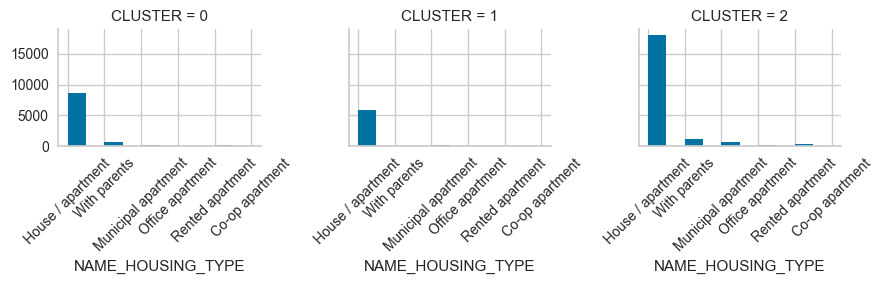

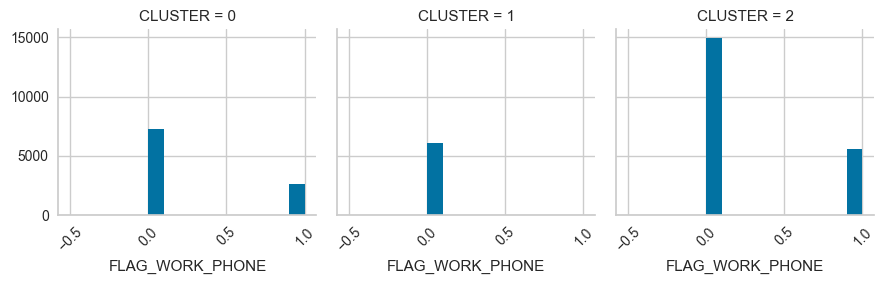

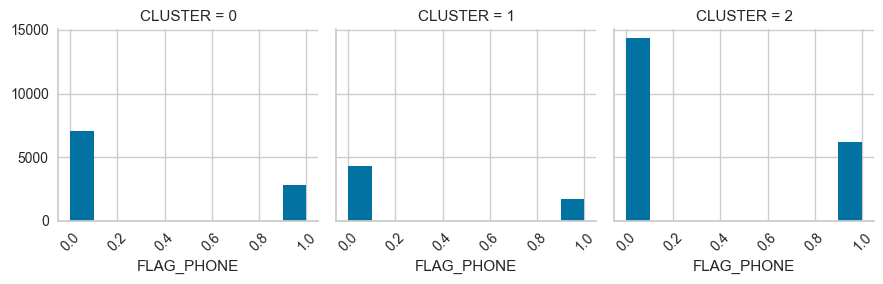

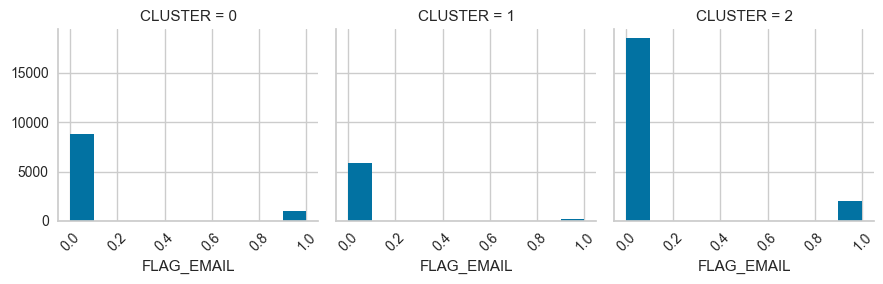

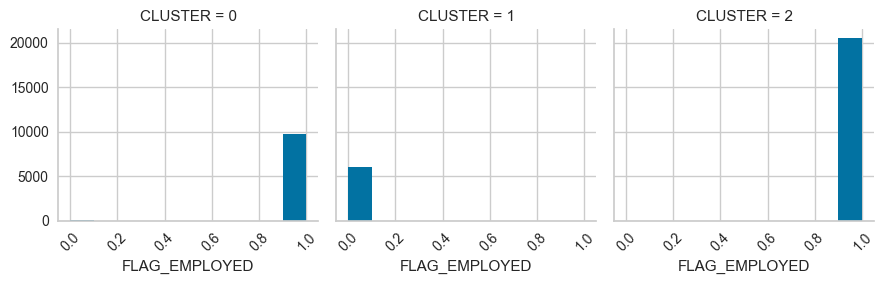

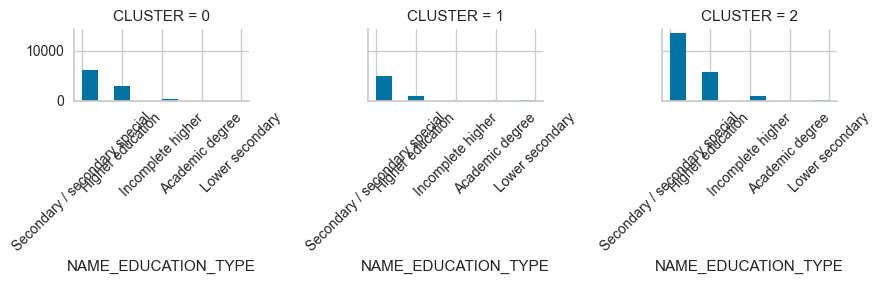

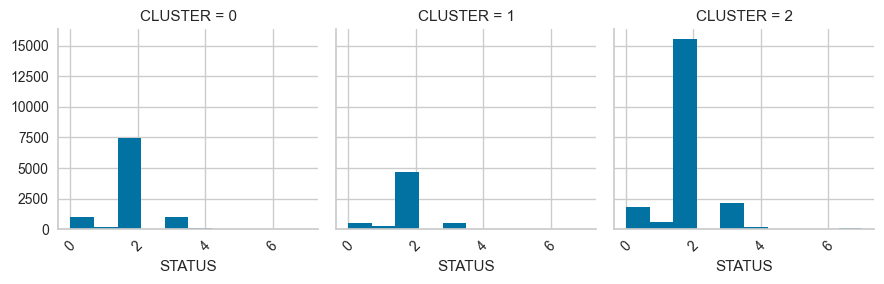

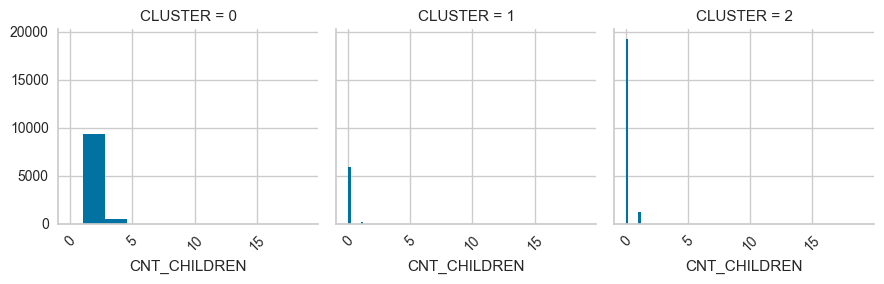

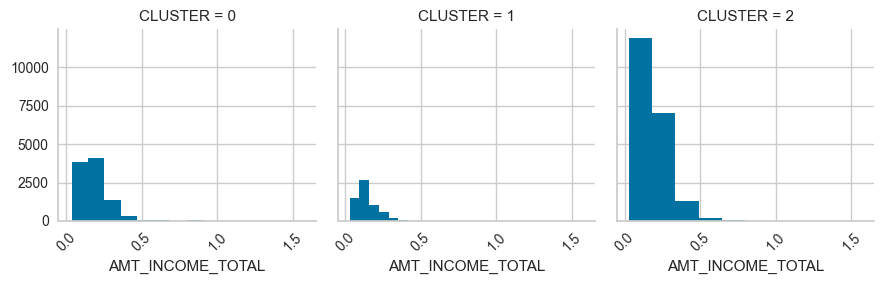

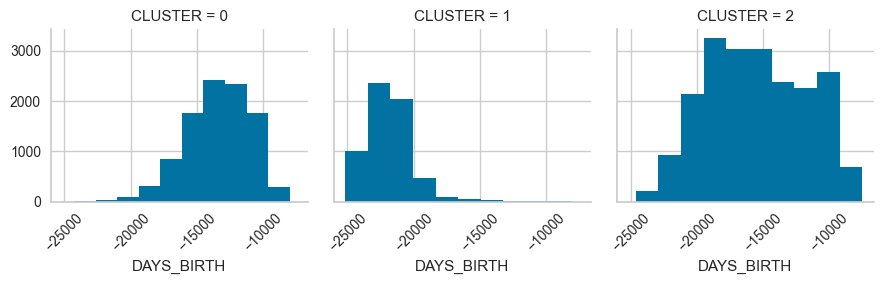

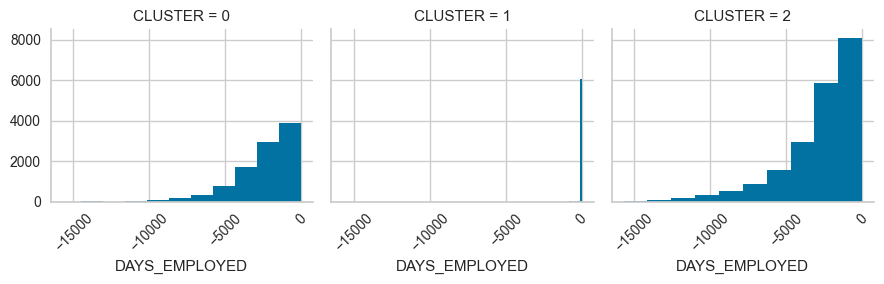

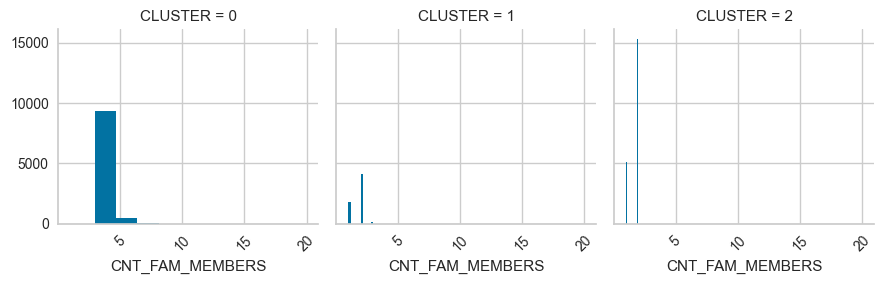

In [68]:
#Looping untuk membandingkan nilai perkolom per clusternya
for c in col_used:
    grid= sns.FacetGrid(df_merged, col='CLUSTER')
    grid.map(plt.hist, c)
    for axes in grid.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    plt.tight_layout()

Dari Hasil Pengelompokan diatas dimana ada 3 Kelompok, berikut adalah penjelasan mengenai pengelompokan:
- **Cluster 0** merupakan Kelompok yang masih aktif bekerja dengan usia yang cenderung lebih muda dan pengalaman bekerja yang tidak banyak, namun memiliki tanggungan yang cukup banyak seperti memiliki anak dan menafkahi keluarganya.
- **Cluster 1** merupakan Kelompok yang cenderung sudah tidak bekerja dimana seluruh pendapatannya didapatkan dari uang pensiunan, dan memiliki usia yang terbilang sudah tidak muda lagi.
- **Cluster 2** merupakan Kelompok yang masih aktif bekerja dengan usia yang menengah dimana tanggungannya tidak sebanyak cluster 0 dimana pada kelompok ini, mereka cenderung memiliki jumlah keluarga yang sedikit.

Untuk melihat visualisasi lebih lanjut dapat mengunjungi link [Tableau](https://public.tableau.com/app/profile/arvin.melvillo/viz/ApplicantCreditSegmentation/DemographicDashboard) ini.

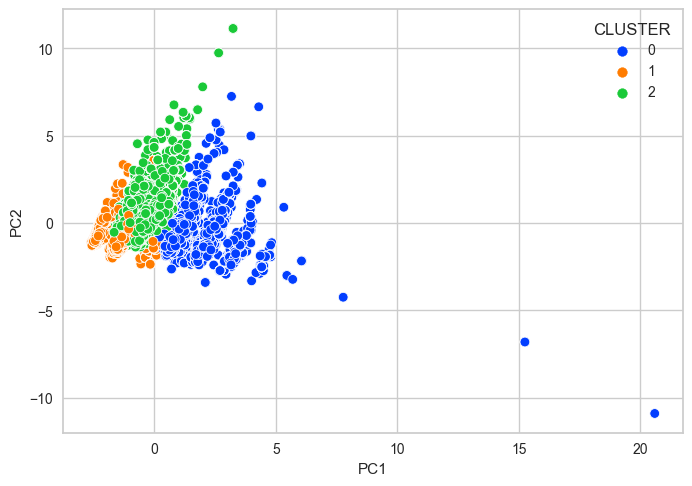

In [69]:
#Mereduksi dimensi menjadi 2 komponen PCA
pca_visualize = PCA(n_components=2)
data_reduced = pca_visualize.fit_transform(preprocessor.fit_transform(df_merged.drop('CLUSTER', axis=1)))
#Membuat Dataframe dari data setelah di PCA
data_reduced = pd.DataFrame(data_reduced, columns= ['PC1','PC2'])
#Menambah kolom untuk cluster
data_reduced['CLUSTER'] = cluster
#Membuat scatterplot untuk cluster
sns.scatterplot(data=data_reduced, x="PC1", y="PC2", hue="CLUSTER",palette="bright");

# Model Saving and Data Saving

In [70]:
with open('kmeans_model.pkl', 'wb') as file_1:
  joblib.dump(km, file_1)

In [71]:
df_merged.to_csv('data_credit.csv', index=False)

# Model Inference

Model inference dapat di cek pada `inference.ipynb` atau jika ingin melakukan inferencing sendiri dapat dilakukan di [link inference](https://huggingface.co/spaces/arvillo/credit_card_segmentation)

# Kesimpulan

Dalam kasus ini, kita dapat melihat bahwa kebanyakan applicant merupakan seorang wanita. Kebanyakan applicant juga cenderung tidak memiliki mobil namun mereka memiliki properti sendiri sehingga kemungkinan applicant - applicant mengajukan credit untuk biaya tanggungan properti mereka. Kebanyakan applicant juga tinggal atau menetap di rumah atau apartemen. Applicant juga cenderung masih bekerja untuk mendapatkan penghasilan sehari - harinya. Applicant juga cenderung sudah menikah dan cenderung belum memiliki anak. Applicant juga cenderung tidak memiliki telepon kerja, telepon, ataupun email. \
Dari Hasil Pengelompokan kasus ini ditemuakan 3 Kelompok applicant yang dimana:
- **Cluster 0** merupakan Kelompok yang masih aktif bekerja dengan usia yang cenderung lebih muda dan pengalaman bekerja yang tidak banyak, namun memiliki tanggungan yang cukup banyak seperti memiliki anak dan menafkahi keluarganya.
- **Cluster 1** merupakan Kelompok yang cenderung sudah tidak bekerja dimana seluruh pendapatannya didapatkan dari uang pensiunan, dan memiliki usia yang terbilang sudah tidak muda lagi.
- **Cluster 2** merupakan Kelompok yang masih aktif bekerja dengan usia yang menengah dimana tanggungannya tidak sebanyak cluster 0 dimana pada kelompok ini, mereka cenderung memiliki jumlah keluarga yang sedikit.

Untuk improvement dari kasus ini, dikarenakan histori kredit tidak membantu untuk mengkelompokkan applicant, maka sebaiknya mengelompokkan applicant tidak perlu menggunakan histori kredit mereka. Jikalau ingin mengelompokkan dengan histori kredit, sebaiknya histori kredit para applicant baru dimasukkan tanda `0` dimana diartikan sebagai tidak ada peminjaman di bulan tersebut